# テンソルと画像処理

In [1]:
import numpy as np


def gray_show(img):
    plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
    # plt.axis("off")
    plt.show()

## この章で学ぶこと

- numpy配列でモノクロ画像の描画
- matplotlibの使い方
- numpy配列でカラー画像の描画
- numpy配列で画像を自在に操り，フォトショップの機能を一部実装

章末には100本ノックがある. 



## 行列と画像

1画素8ビットのカラーチャンネルは，numpy配列の多次元行列として表現することが可能である. 



### 背景一色の画像

In [2]:
M, N = 300, 400
img = np.zeros((M, N), dtype = np.uint8)

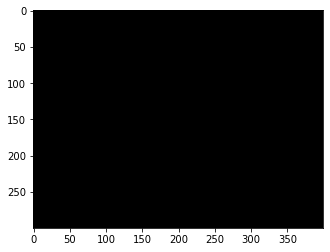

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

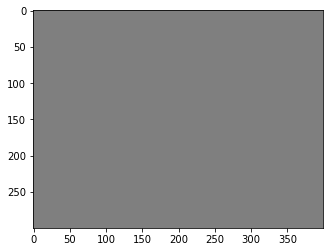

In [4]:
img = np.full((M, N), 127, dtype = np.uint8)
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

## 直線を引く

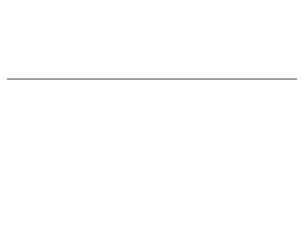

In [5]:
# 真っ白なキャンバスを用意して
img = np.full((M, N), 255, dtype = np.uint8)
# 黒い横線を引く
img[100, :] = 0
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis("off")
plt.show()

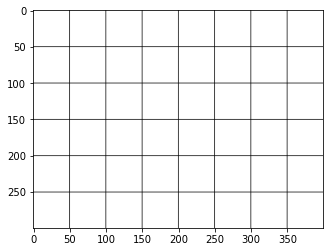

In [6]:
img = np.full((M, N), 255, dtype = np.uint8)
img[50::50, :] = 0
img[:, 50::50] = 0
gray_show(img)


### 斜めの線

境界 + 適当な幅のデータをプロットする。


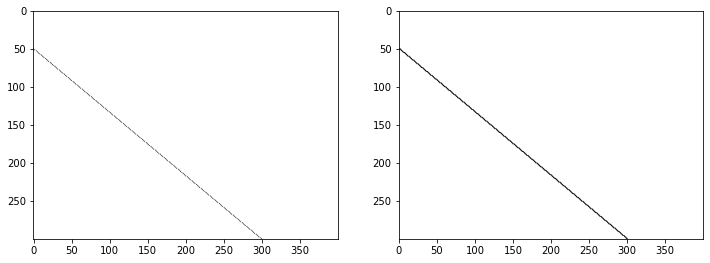

In [7]:
fig = plt.figure(figsize = (12, 6))
for i, width in enumerate([.5, 1]):
    img = np.full((M, N), 255, dtype = np.uint8)
    # mesh_gridのようなイメージ
    # img.shape点を作成している
    y_ind, x_ind = np.indices(img.shape)
    ax = fig.add_subplot(1, 2, i + 1)
    # 境界からの距離を求めて（横幅）その点をプロット
    mask = np.abs(x_ind - 300 / 250 * (y_ind -50)) <= width
    img[mask] = 0
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

In [8]:
np.indices((M, N))

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [297, 297, 297, ..., 297, 297, 297],
        [298, 298, 298, ..., 298, 298, 298],
        [299, 299, 299, ..., 299, 299, 299]],

       [[  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        ...,
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399]]])

## matplotlibでの複数グラフの書き方

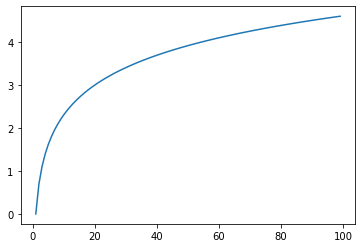

In [9]:
x = np.arange(100)
plt.plot(x, np.log(x))
plt.show()

`fig.gca`はget current axesの略であり，axesを取得する際に使うことが可能である. 
`fig.get_axes`はfigureの中にどのaxesがあるのかを見ることが可能である. 

In [10]:
fig = plt.figure()
fig.get_axes()

[]

<Figure size 432x288 with 0 Axes>

In [11]:
ax = fig.gca()

In [12]:
fig.get_axes()

[<AxesSubplot:>]

In [13]:
fig.clear() # axesが解消される
fig.get_axes()

[]

### 複数のaxes

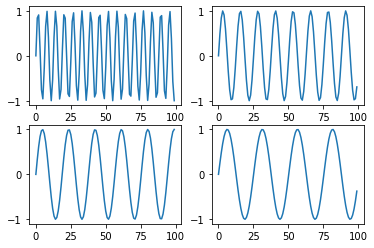

In [14]:
fig = plt.figure()
for i in range(4):
    # グラフの配置の形 x, y とグラフの位置
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(x, np.sin(x / (i + 1)))
plt.show()

In [15]:
# プロットしてもaxesは残っている
fig.get_axes()

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

### 画像をプロット

0
25
51
76
102
127
153
178
204


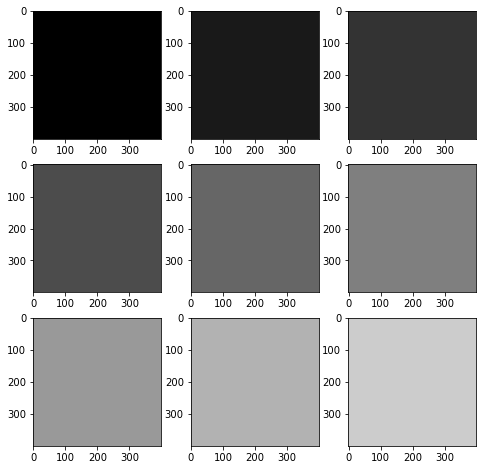

In [16]:
fig = plt.figure(figsize = (8, 8))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    print(255 * i // 10)
    img = np.full((400, 400), 255 * i // 10, dtype = np.uint8)
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


In [17]:
1 // 10

0

## 市松模様を作る

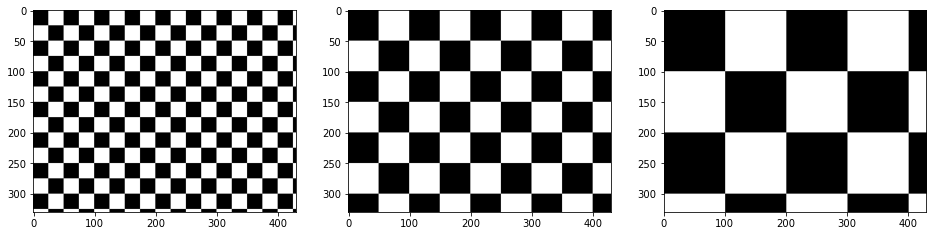

In [18]:
alist = [25, 50, 100]
fig   = plt.figure(figsize = (16, 8))
for l, a in enumerate(alist):
    img = np.zeros((330, 430), dtype = np.uint8)
    for i in range(int(np.ceil(img.shape[0] / a))):
        for j in range(int(np.ceil(img.shape[1] / a))):
            if (i + j) % 2 == 1:
                # numpy配列は要素数を超えても問題がない！！！！
                img[i * a:(i + 1) * a, j * a:(j + 1) * a] = 255
    ax = fig.add_subplot(1, 3, l + 1)
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


In [19]:
a = np.arange(10)
a[1:12]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## グラデーション

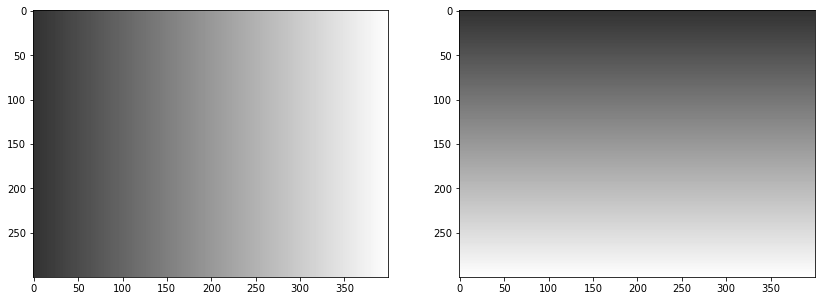

In [20]:
start_color = 50
end_color   = 255
fig = plt.figure(figsize = (14, 8))

# 横方向
img = np.zeros((300, 400), np.uint8)
for i in range(img.shape[0]):
    img[i,:] = np.linspace(start_color, end_color, img.shape[1], dtype = img.dtype)
ax = plt.subplot(1, 2, 1)
ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


# 縦方向
img = np.zeros((300, 400), np.uint8)
for i in range(img.shape[1]):
    img[:, i] = np.linspace(start_color, end_color, img.shape[0], dtype = img.dtype)
ax = plt.subplot(1, 2, 2)
ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)



ブロードキャストを使った特殊な書き方. 

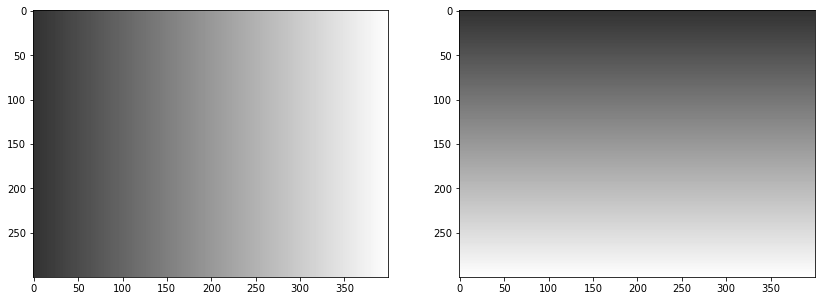

In [21]:
start_color = 50
end_color = 255
fig = plt.figure(figsize=(14, 8))
img_shape = (300, 400)# 横方向
img = np.broadcast_to(np.linspace(start_color,end_color, img.shape[1],                                  dtype=np.uint8)[None, :], img_shape)
ax = plt.subplot(1, 2, 1)
ax.imshow(img, cmap="gray", vmin=0, vmax=255)# 縦方向
img = np.broadcast_to(np.linspace(start_color,end_color, img.shape[0],                                   dtype=np.uint8)[:,None], img_shape)
ax = plt.subplot(1, 2, 2)
ax.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

次の部分が本質なのかと思うけど，内容的にはブロードキャストを明示的に実行しているということなのかと思う。その際に，ブロードキャストの対象の形状をブロードキャストする先の形状に合わせていることがわかる. 

In [22]:
np.broadcast_to(
    np.linspace(start_color,end_color, img.shape[1], dtype=np.uint8)[None, :],  
    img_shape)

array([[ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       ...,
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255]], dtype=uint8)

### 斜めのグラデーション

図書を見てもらうとわかるように，斜めのグラデーションを作るには，線形補間の応用で大丈夫である。線形補間の式は同じであるが，行により横軸が変わっていくイメージである。




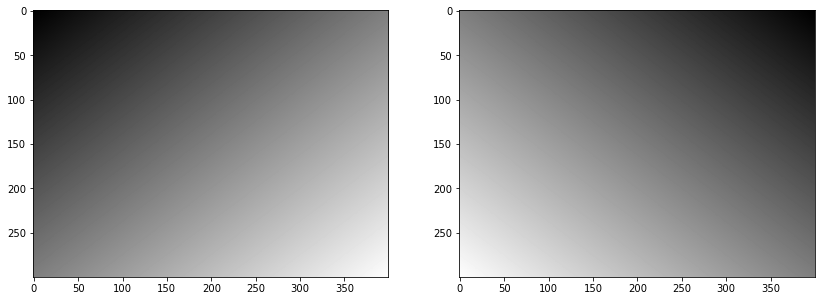

In [26]:
start_color = 0
end_color   = 255
fig = plt.figure(figsize = (14, 8))

img1 = np.zeros((300, 400), dtype = np.uint8)
img2 = np.zeros_like(img1)

for i in range(img.shape[0]):
    left  = start_color + (end_color - start_color) * i / img.shape[0] / 2
    right = (end_color + start_color) / 2 + (end_color - start_color) * i / img.shape[0] / 2
    img1[i,:]  = np.linspace(left, right, img1.shape[1])
    img2[i, :] = np.linspace(left, right, img2.shape[1])[::-1]

ax = fig.add_subplot(1, 2, 1)
ax.imshow(img1, cmap = "gray", vmin = 0, vmax = 255)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(img2, cmap = "gray", vmin = 0, vmax = 255)
plt.show()






## 円の描画

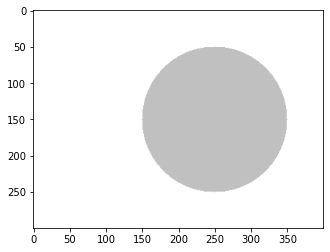

In [29]:
img = np.full((300, 400), 255,  dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)
mask = (x_ind - 250) ** 2 + (y_ind - 150) ** 2 <= 100 ** 2
img[mask] = 192

gray_show(img)

### 円の境界に色を付ける. 

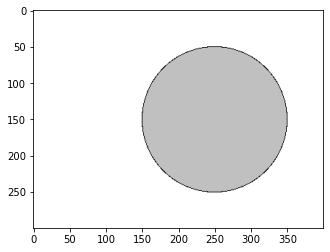

In [35]:
img = np.full((300, 400), 255,  dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)
v = (x_ind - 250) ** 2 + (y_ind - 150) ** 2
img[v <= 100 ** 2] = 192

# 境界の設定
border_mask = np.logical_and(v >= 99.5 ** 2, v <= 100.5 ** 2)
img[border_mask] = 0

gray_show(img)

## 弾の描画

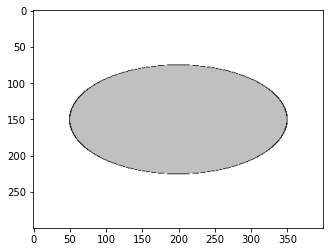

In [37]:
img = np.full((300, 400), 255, dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)

v = (x_ind - 200) ** 2 / 150 ** 2 + (y_ind - 150) ** 2 / 75 ** 2
img[v <= 1] = 192

border_mask = np.logical_and(v >= .995 ** 2, v <= 1.005 ** 2)
img[border_mask ] = 0

gray_show(img)

## 極座標

In [38]:
def cart2pol(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    tehta = np.arctan2(y, x)
    return (r, theta)

def pol2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return (x, y)

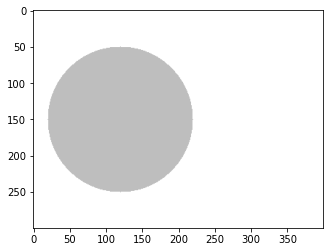

In [39]:
img = np.full((300, 400), 255, dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)
r, theta = np.sqrt((x_ind - 120) ** 2 + (y_ind - 150) ** 2), np.arctan2(y_ind-150, x_ind-120)
mask = r <= 100
img[mask] = 190

gray_show(img)

### レムニスケート

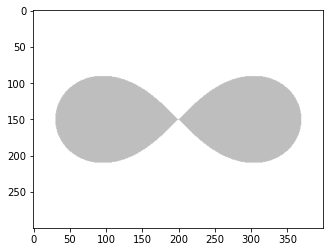

In [43]:
img = np.full((300, 400), 255, dtype = np.uint8)
y_ind, x_ind = np.indices(img.shape)
r, theta = np.sqrt((x_ind - 200) ** 2 + (y_ind - 150) ** 2), np.arctan2(y_ind-150, x_ind-200)

a = 120
mask = r ** 2 - 2 * a ** 2 * np.cos(2 * theta) <= 0
img[mask] = 190

gray_show(img)




## カラー画像の作り方

In [47]:
r_ch = np.zeros((300, 400), dtype = np.uint8)
g_ch = np.zeros_like(r_ch)
b_ch = np.zeros_like(g_ch)

# 3次元目に新しい軸を追加する. 
img = np.stack([r_ch, g_ch, b_ch], axis = -1)
img.shape

(300, 400, 3)

あるいは, 


In [48]:
img = np.zeros((300, 400, 3), dtype = np.uint8)
img.shape

(300, 400, 3)

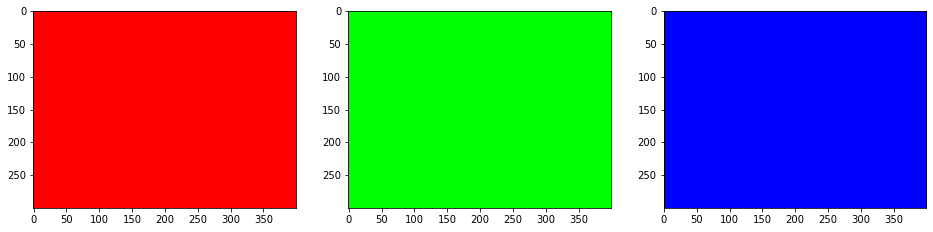

In [53]:
fig = plt.figure(figsize = (16, 7))
for i in range(3):
    img = np.zeros((300, 400, 3), dtype = np.uint8)
    # 3チャンネルのうち1つだけ塗りつぶしを行う. 
    img[..., i] = 255
    ax = fig.add_subplot(1, 3, i + 1)
    # カラー画像の場合には範囲指定をする必要がない
    ax.imshow(img)
plt.show()


In [51]:
img[0, 0, :]

array([  0,   0, 255], dtype=uint8)

## カラー画像での矩形塗りつぶし



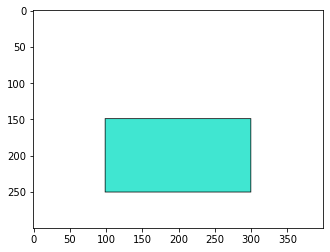

In [55]:
img = np.full((300, 400, 3), 255, dtype = np.uint8)
# 境界用の矩形
img[149:251, 99:301, :] = 0
# 境界用の矩形の内側を塗りつぶし
# [None, None, :]はなくてもよい. ただし次元が合っている感が出るのであった方がわかりやすい気がする. 
img[150:250, 100:300, :] = np.array([64, 230, 209], dtype = np.uint8)[None, None, :]

plt.imshow(img)
plt.show()

## テキストの描画

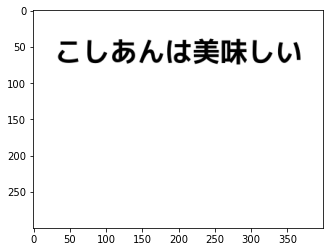

uint8 (300, 400, 3)


In [57]:
from PIL import Image, ImageDraw, ImageFont

with Image.new("RGB", (400, 300), color=(255, 255,255)) as canvas:    
    draw = ImageDraw.Draw(canvas)    
    font =ImageFont.truetype("numpy_book/fonts/M_PLUS_1p/MPLUS1p-Bold.ttf", 38)    
    draw.text((30, 30), "こしあんは美味しい", font=font, fill=0)

    plt.imshow(canvas)
    plt.show()
    
    text_array = np.array(canvas)
    print(text_array.dtype, text_array.shape)


### テキスト画像のトリミング

[40, 35, 73, 367]


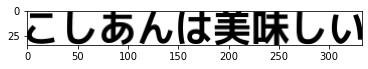

In [58]:
text_points = np.where(text_array[:, :, 0] == 0) # 白か黑かしかないのでR=0で判定
text_area = [np.min(text_points[0]),np.min(text_points[1]), np.max(text_points[0]),np.max(text_points[1])]
print(text_area) # [40, 35, 73, 367]
text_array_trimmed =text_array[text_area[0]:text_area[2]+1,text_area[1]:text_area[3]+1, :] # 終端に+1をする

plt.imshow(text_array_trimmed)
plt.show()


### テキストへのグラデーション

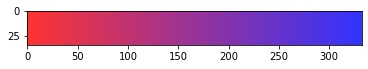

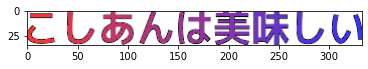

In [59]:
gradients = np.empty_like(text_array_trimmed)# (R,G,B) = (255, 51, 51) -> (51, 51, 255)への縦グラデーション
gradients[:,:,0] = np.linspace(255, 51,gradients.shape[1], dtype=np.uint8)[None, :]
gradients[:,:,1] = 51
gradients[:,:,2] = np.linspace(51, 255,gradients.shape[1], dtype=np.uint8)[None, :]
plt.imshow(gradients)
plt.show()# テキストのレイヤーマスク
layer_mask = (text_array_trimmed[:,:,0] ==0).astype(np.uint8)[:, :, None]# グラデーションをテキストに乗せる
output = text_array_trimmed * (1-layer_mask) + gradients * layer_mask
plt.imshow(output)
plt.show()